In [125]:
import numpy as np  # Allows us to work with arrays.
import matplotlib.pyplot as plt  # Allows working with plots.
import pandas as pd  # importing pandas’ library for use. Allows us to import data set and manipulate it.

import seaborn as sns  # Allows to polt beautiful plots.
import matplotlib.pyplot as plt # plotting.


from sklearn.compose import ColumnTransformer  # helps with encoding.
from sklearn.preprocessing import OneHotEncoder  # Does onehotencode.
from sklearn.preprocessing import LabelEncoder   # Does 1 and 0 encoding.
from sklearn.model_selection import train_test_split  # Splits dataset into test set and traning set. 
from sklearn.preprocessing import StandardScaler  # Perform the feature scaling.
from sklearn.linear_model import LogisticRegression  # Performs logistic regression.
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, multilabel_confusion_matrix  # creates a confusion matrix
from sklearn.metrics import accuracy_score  # Returns accury score of a model.
from sklearn.metrics import precision_recall_fscore_support
from sklearn.neighbors import KNeighborsClassifier  # performs K Neariesst Neighobour.
from sklearn.impute import KNNImputer  # imputes missing values using KNN.
from sklearn.svm import SVC  # Performs svm
from sklearn.naive_bayes import GaussianNB  # performs naive_bayes gaussianNB.
from sklearn.tree import DecisionTreeClassifier  #Perfroms decision tree classification model.
from sklearn.ensemble import RandomForestClassifier  #Performs random forest classification.
from xgboost import XGBClassifier  # performs xgboost classification. gradiant decision trees.
from sklearn.linear_model import LinearRegression  # will use to replace missing values linear regressoin
from sklearn.decomposition import PCA  # Performs model optimization
from sklearn.decomposition import KernelPCA  # Performs model optimization
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA # performs model optimization
from sklearn.model_selection import cross_val_score  # performs cross validation. Helps in model selection.
from sklearn.model_selection import GridSearchCV  # helps select the best hyper parameters
from sklearn.model_selection import RandomizedSearchCV

import warnings
warnings.filterwarnings("ignore")

#%matplotlib inline  # helps in showing plots on the browser.

In [126]:
df = pd.read_csv("iris.csv")



In [127]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [128]:
df.isnull().sum()  # Checking the dataframe for null values.

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [129]:
print(df.pivot_table(columns=['Species'], aggfunc='size'))

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


In [130]:
df = df.drop('Id', 1)

In [131]:
le = LabelEncoder()
df.Species = le.fit_transform(df.Species)

In [132]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [133]:
print(df.pivot_table(columns=['Species'], aggfunc='size'))

Species
0    50
1    50
2    50
dtype: int64


In [134]:
X = df.iloc[:, :-1].values  # selecting the values for the X variable.
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [135]:
y = df[["Species"]].to_numpy()   # selecting the values for the Y variable. # done using .to_numpy and not 
                                                       # .iloc as .to_numpy creates a horizontal bar while .iloc creates a 
                                                       # horizontal bar which will not alighn with the x values.
y

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
    

In [136]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
# test_size = 0.2               # splitting the data into 80 and 20 percent between the training and test set           
                                            # to get the best results.                                                           
# random_state = 1         # resetting the  random seed

In [144]:
def Grid_search_fun(typeofmodelandprams, dict_prams, crossval, X, y):  # Function takes in the model type, hyperparameters, number of crossvalidation sand X and y values.

    model = typeofmodelandprams  # creating an instance of the object.
    parameters = [dict_prams]  # hyper parameters for the grid search
    grid_search = GridSearchCV(estimator = model,  # model
                           param_grid = parameters,  # hyper paramaters 
                           scoring = 'accuracy',  # score measurement
                           cv = crossval, # number of cross validations 
                           n_jobs = -1, return_train_score=False)  # selecting all possible paramaters to go through to get the best model possible # train score is false as it can be computationaly expensive. without storing the traning score the grd search is fater
    grid_search.fit(X, y)  # applying the search on our model.
    #print(pd.DataFrame(grid_search.cv_results_)[["mean_test_score","params"]])
    print(pd.DataFrame(grid_search.cv_results_)) # to print the whole result

    best_accuracy = grid_search.best_score_  # the best accuracy 
    best_parameters = grid_search.best_params_  # the best paramaters that gave the best accurecy
    print("Best Accuracy: {:.2f} %".format(best_accuracy*100))  # printing best accuracy
    print("Best Parameters:", best_parameters)  # printing the best parameters
    
    print(parameters)  # prininting the parameters


    return grid_search  # returns grid search value
    



In [142]:
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, roc_auc_score, f1_score

def Classifier_function(typeofmodelandprams, X_train, y_train, title):  # function takes the type of model, the hyperparameters of the
    # model, the x_train and y_train to get our results.
  model = typeofmodelandprams  # Bulding an object of the class
  model.fit(X_train, y_train)  # Building the k-nearest neighbors classification model.

  y_test_p = model.predict(X_test)  # Predicted results.
  print("  results\npred-Actual")  # printing predicted and real values.
  print(np.concatenate((y_test_p.reshape(len(y_test_p),1),y_test.reshape(len(y_test),1)),1))  # Predicted results and real results in a np array.
   

  train_accuracy = round(model.score(X_train,y_train),2) * 100
  test_accuracy = round(model.score(X_test,y_test),2) * 100

  print("Model train accuracy: ", train_accuracy, "%")  # printing the model accurcy. 
  print("Model test accuracy: ", test_accuracy, "%")  # printing the model accurcy. 


  print("\n\n")
  # getting Accuracy or recall or precision or specificity
  y_test_pred = model.predict(X_test)
  
  cReport = classification_report(y_test,y_test_pred)
  print(cReport)
  
  cm = confusion_matrix(y_test, y_test_p)  # creating the confusion matrix
  cm2 = multilabel_confusion_matrix(y_test, y_test_pred)
  print("correct_0-incorrct_1\nincorrect_0-correct_1\n")  # printing correct and inccrocet results.
  print("True_Negative-False_positive\nFalse_negative-True_positive\n")  # printing correct and inccrocet results.



  precision, recall, f1_score, support = precision_recall_fscore_support(y_test, y_test_pred)
  accuracy  = round(np.trace(cm) / float(np.sum(cm)), 2) * 100
  precision = round(np.mean(precision),2) * 100
  recall = round(np.mean(recall),2) * 100
  f1_score = round(np.mean(f1_score),2) * 100

  lable_list = []
  flase_negatives = [0]

  for i in range(len(cm)):
    if i > 0:
     flase_negatives.append(0)


    for j in range(len(cm)):

        if j == i:
            lable_list.append("Actual "+ str(i) +"\n" + "calssified as "+ str(j) +"\n" + str(cm[i][j]) + "\n"+ str(round(cm[i][j]/np.sum(cm),2)) + " %")

        else:
            lable_list.append("Actual "+ str(i) +"\n" + "calssified as "+ str(j) + "\n"  + str(cm[i][j]) + "\n"+str(round(cm[i][j]/np.sum(cm),2)) + " %")
            flase_negatives[i] = flase_negatives[i] + cm[i][j]
            

  lable_list = np.asarray(lable_list).reshape(3,3)
  

  total_score = ("Accuracy:   " + str(accuracy) +" %" + "\nPrecison:    "  + str(precision)  +" %" + "\nRecall:        " + str(recall)  +" %" + "\nF1 score:    "  + str(f1_score) +" %") 
  



  disp = sns.heatmap(cm, annot=lable_list, fmt='', cmap='Blues')                           
  disp.plot()  # displaying data in plot
  plt.title(title)  # adding a title to plot
  plt.ylabel('True label')
  plt.xlabel('Predicted label' +"\n\nScores\n" +total_score)
  plt.show()  # showing the plot
    


  

  return test_accuracy

In [145]:
def rand_search_fun(typeofmodelandprams, dict_prams,crossval, X, y):  # Function takes in the model type, hyperparameters, number of crossvalidation sand X and y values.

    model = typeofmodelandprams  # creating an instance of the object.
    parameters = [dict_prams]  # hyper parameters for the random search 
    rand_search = RandomizedSearchCV(
                           model,
        #estimator = model,  # model
                           #param_distributions = parameters,  # hyper paramaters 
                           parameters,
                           scoring = 'accuracy',  # score measurement
                           cv = crossval, # number of cross validations 
                           n_jobs = -1, # selecting all possible paramaters to go through to get the best model possible 
                           return_train_score=False, # train score is false as it can be computationaly expensive. without storing the traning score the grd search is fater
                           n_iter=10,  # setting the number of iterations
                           random_state=5)  
    rand_search.fit(X, y)  # applying the search on our model.
    #print(pd.DataFrame(rand_search.cv_results_)[["mean_test_score","params"]])
    print(pd.DataFrame(rand_search.cv_results_)) # to print the whole result

    best_accuracy = rand_search.best_score_  # the best accuracy 
    best_parameters = rand_search.best_params_  # the best paramaters that gave the best accurecy
    print("Best Accuracy: {:.2f} %".format(best_accuracy*100))  # printing best accuracy
    print("Best Parameters:", best_parameters)  # printing the best parameters
    
    print(parameters)  # prininting the parameters 


    return rand_search  # return random search value.
    



In [140]:
def crossvalscore(model, X, y, cv_val):
    score = cross_val_score(estimator = model, X = X, y = y, cv = cv_val)   # performs different tests to get best accuracy.
    print("Accuracy: {:.2f} %".format(score.mean()*100))  # accuracy printed
    print("Standard Deviation: {:.2f} %".format(score.std()*100))  # standard deveation printed (std -avarage or std+ avarage )
    return score

In [137]:
def linear_plot(xlab, ylab, l1, l2, title,lg ,lg_lc):
    plt.title(title,fontsize=18)
    plt.plot(xlab, ylab)
    plt.xlabel(l1)
    plt.ylabel(l2)
    plt.legend([lg], loc=lg_lc)
    plt.grid()

In [138]:
def K_NN_plot(X,y):
    ave_scores = []
    k_list = list(range(1,15))
    for k in k_list:
        model = KNeighborsClassifier(n_neighbors = k) 
        scores = cross_val_score(model,X,y,cv=5,scoring="accuracy")
        ave_scores.append(round(scores.mean(),3))
    print("ave scores ", ave_scores)
    linear_plot(k_list, ave_scores, "Number of nearest neighbours", "Average CV model accuracy", "Best KNN Selection",\
                "KNN", "lower left")


    plt.grid()

# Plotting the KNN's with a average Cross-val score

ave scores  [0.96, 0.947, 0.967, 0.973, 0.973, 0.98, 0.98, 0.967, 0.973, 0.98, 0.98, 0.98, 0.973, 0.967]


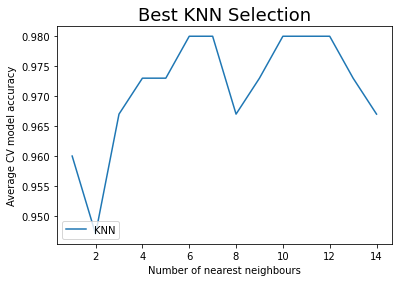

In [169]:
K_NN_plot(X,y)

# Cross Validation

In [141]:
crossvalscore(KNeighborsClassifier(n_neighbors=1), X, y, 10) #true 0 false 0 

Accuracy: 96.00 %
Standard Deviation: 5.33 %


array([1.        , 0.93333333, 1.        , 0.93333333, 0.86666667,
       1.        , 0.86666667, 1.        , 1.        , 1.        ])

# Grid Search

In [146]:
k_list = list(range(1,31))  # list from 1 - 31 (will be used as KNN's)
weight_list = ["uniform", "distance"]  # weights list uniform and distance
para_grid = dict(n_neighbors=k_list,weights=weight_list)  # adding the above lists in a dictinorr.

grid_search = Grid_search_fun(KNeighborsClassifier(n_neighbors=k_list), para_grid, 5, X, y)  # Using the grid search function 
                                                                                      # with arguments given 

    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.036853      0.030077         0.008768        0.000937   
1        0.017781      0.018499         0.008304        0.006997   
2        0.002173      0.000638         0.007146        0.001105   
3        0.022707      0.039959         0.009547        0.012321   
4        0.002307      0.000371         0.007135        0.001274   
5        0.001959      0.000500         0.003476        0.000582   
6        0.002411      0.000493         0.006247        0.000867   
7        0.002804      0.000687         0.004530        0.000781   
8        0.002083      0.000675         0.008463        0.002418   
9        0.002310      0.000584         0.003457        0.000450   
10       0.002121      0.001179         0.007152        0.001917   
11       0.002141      0.000204         0.003851        0.002542   
12       0.002197      0.000954         0.007089        0.001366   
13       0.002264      0.000326         0.002786

In [147]:
grid_search.cv_results_["mean_test_score"] # looking at mean test score

array([0.96      , 0.96      , 0.94666667, 0.96      , 0.96666667,
       0.96666667, 0.97333333, 0.96666667, 0.97333333, 0.96666667,
       0.98      , 0.98      , 0.98      , 0.98      , 0.96666667,
       0.98      , 0.97333333, 0.97333333, 0.98      , 0.98666667,
       0.98      , 0.98666667, 0.98      , 0.98666667, 0.97333333,
       0.98      , 0.96666667, 0.97333333, 0.96666667, 0.97333333,
       0.96666667, 0.97333333, 0.96666667, 0.97333333, 0.96666667,
       0.97333333, 0.96666667, 0.97333333, 0.96      , 0.97333333,
       0.96666667, 0.97333333, 0.96      , 0.97333333, 0.96      ,
       0.98      , 0.94666667, 0.98      , 0.96      , 0.96666667,
       0.94666667, 0.96      , 0.94666667, 0.97333333, 0.94      ,
       0.96      , 0.93333333, 0.96666667, 0.94      , 0.96      ])

In [148]:
uniform = []  # a empty list is created
for i in range(0, len(grid_search.cv_results_["mean_test_score"]), 2):  # getting all even number indexes using a for loop.

    uniform.append(grid_search.cv_results_["mean_test_score"][i])  # appending the unifrom values to the varibale unifrom.

In [149]:
distance = []  # a empty list is created
for i in range(1, len(grid_search.cv_results_["mean_test_score"]), 2):  # getting all odd number indexes using a for loop.
    distance.append(grid_search.cv_results_["mean_test_score"][i])  # appending the distance values to the varibale unifrom.

In [150]:
print(distance)   # printing the values distace variable.

[0.96, 0.96, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9800000000000001, 0.9800000000000001, 0.9800000000000001, 0.9733333333333334, 0.9866666666666667, 0.9866666666666667, 0.9866666666666667, 0.9800000000000001, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9800000000000001, 0.9800000000000001, 0.9666666666666668, 0.96, 0.9733333333333334, 0.9600000000000002, 0.9666666666666668, 0.96]


In [151]:
print(uniform)  # printing the values uniform variable.

[0.96, 0.9466666666666665, 0.9666666666666668, 0.9733333333333334, 0.9733333333333334, 0.9800000000000001, 0.9800000000000001, 0.9666666666666668, 0.9733333333333334, 0.9800000000000001, 0.9800000000000001, 0.9800000000000001, 0.9733333333333334, 0.9666666666666666, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9666666666666666, 0.9666666666666668, 0.96, 0.9666666666666668, 0.96, 0.96, 0.9466666666666667, 0.96, 0.9466666666666665, 0.9466666666666667, 0.9399999999999998, 0.9333333333333332, 0.9399999999999998]


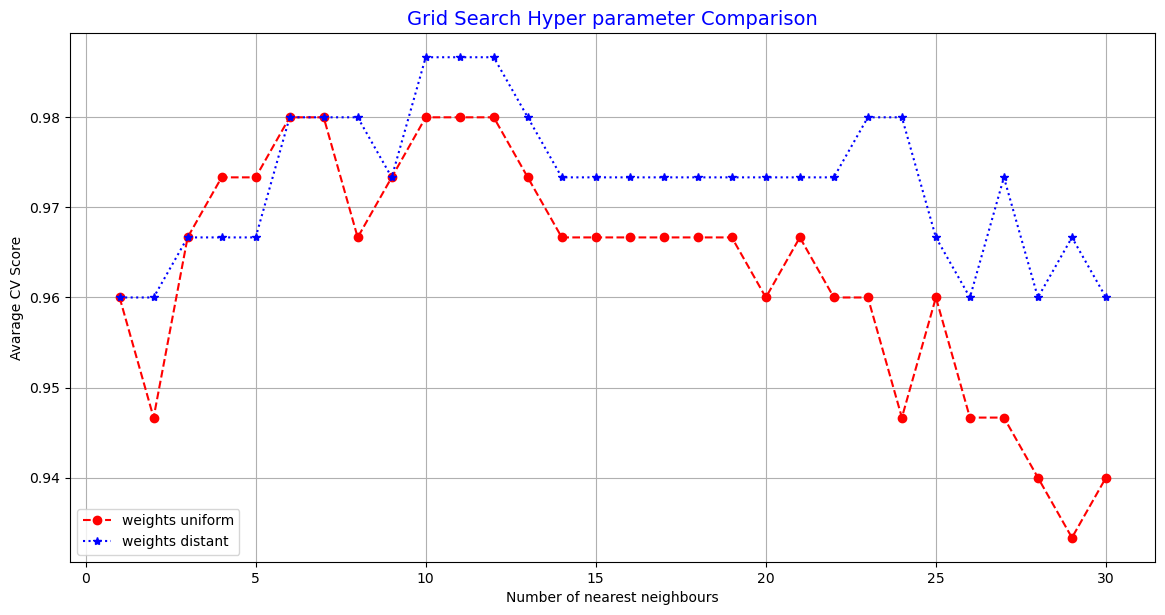

In [152]:
plt.figure(dpi=100, figsize=(14, 7))  # setting the plot size
plt.title("Grid Search Hyper parameter Comparison",fontsize=14, color="blue")  # setting the plot title.
plt.plot(k_list,uniform , "--", marker = "o", label="weights uniform", color="red")  # setting the uniform variables values to 
                                                                           # the plot on the y axis and K_list  on the x axis.
plt.plot(k_list,distance ,":", marker = "*", label="weights distant", color="blue")  # setting the distant variables values 
                                                                         # to the plot on the y axis and K_list  on the x axis.
plt.xlabel("Number of nearest neighbours")  # Setting the x label.
plt.ylabel("Avarage CV Score")  # setting the y label.
plt.legend(loc='lower left')  # setting the legend.
plt.grid()  # setting a grid

# Random search 

In [153]:
k_list = list(range(1,31))  # list from 1 - 31 (will be used as KNN's)
weight_list = ["uniform"]  # weights list uniform
para_rand = dict(n_neighbors=k_list,weights=weight_list)  # adding the above lists in a dictinory.

rand_search = rand_search_fun(KNeighborsClassifier(), para_rand, 5, X, y)  # Using the grid search gunction with
                                                                                               # arguments given 

   mean_fit_time  std_fit_time  mean_score_time  std_score_time param_weights  \
0       0.002524      0.000720         0.006288        0.000752       uniform   
1       0.002553      0.000283         0.005938        0.000998       uniform   
2       0.002081      0.000485         0.006242        0.000636       uniform   
3       0.002367      0.000522         0.007396        0.001553       uniform   
4       0.002441      0.000830         0.006362        0.000812       uniform   
5       0.004007      0.003661         0.011845        0.009723       uniform   
6       0.001944      0.000467         0.006540        0.000730       uniform   
7       0.002005      0.000900         0.006698        0.000613       uniform   
8       0.002651      0.000335         0.008002        0.001380       uniform   
9       0.002425      0.000379         0.008804        0.001611       uniform   

  param_n_neighbors                                     params  \
0                12  {'weights': 'uniform'

In [154]:
uniform = []  # creating a empty list
k_list1 = []  # creating a empty list
for i in range(len(rand_search.cv_results_["mean_test_score"])):  # looping through the times the length of 
                                                                  # the mean_test_score

        uniform.append(rand_search.cv_results_["mean_test_score"][i])  # appending the uniform values ot the uniform variable.
        k_list1.append(rand_search.cv_results_["param_n_neighbors"][i])  # appedning the KNN's to the K_list1.

In [155]:
sorted_uniform = []  # creating a empty list
sorted_list1 = k_list1.copy()  # creating a copy of the K_list1 variables values.
sorted_list1.sort()   # sorting the KNNs
for i in range(len(sorted_list1)):  # Looping through the lenght of the sorted_list1 variable.
    for j in range(len(k_list1)):  # Looping through the lenght of the K_list1 variable.
        if sorted_list1[i] == k_list1[j]:  # checking that if the values of sorted_list1[i] is equal to k_list1[j]
            sorted_uniform.append(uniform[j])  # appeding the unifrom[j] values to the sorted_uniform list.

In [156]:
k_list = list(range(1,31))  # list from 1 - 31 (will be used as KNN's)
weight_list = ["distance"]  # weights list distance
para_rand = dict(n_neighbors=k_list,weights=weight_list)  # adding the above lists in a dictinory.

rand_search = rand_search_fun(KNeighborsClassifier(), para_rand, 5, X, y)  # Using the grid search gunction with 
                                                                          # arguments given 

   mean_fit_time  std_fit_time  mean_score_time  std_score_time param_weights  \
0       0.002470      0.000573         0.006064        0.004363      distance   
1       0.002406      0.000456         0.005632        0.001477      distance   
2       0.002423      0.000631         0.003880        0.000531      distance   
3       0.002243      0.000425         0.004277        0.000756      distance   
4       0.002355      0.000434         0.004720        0.000538      distance   
5       0.002546      0.000466         0.003836        0.000764      distance   
6       0.002402      0.000964         0.003354        0.000709      distance   
7       0.002348      0.000732         0.004665        0.001677      distance   
8       0.002475      0.000925         0.004840        0.001764      distance   
9       0.002326      0.000564         0.004652        0.000706      distance   

  param_n_neighbors                                      params  \
0                12  {'weights': 'distanc

In [157]:
uniform = []  # creating a empty list
k_list1 = []  # creating a empty list
for i in range(len(rand_search.cv_results_["mean_test_score"])):  # looping through the times the length of the mean_test_score

        uniform.append(rand_search.cv_results_["mean_test_score"][i])  # appending the uniform values ot the uniform variable.
        k_list1.append(rand_search.cv_results_["param_n_neighbors"][i])  # appedning the KNN's to the K_list1.

In [158]:
distance = []  # creating a empty list
k_list2 = []  # creating a empty list
for i in range(len(rand_search.cv_results_["mean_test_score"])):  # looping through the times the length of the mean_test_score
        distance.append(rand_search.cv_results_["mean_test_score"][i])  # appending the distance values ot the 
                                                                       # distance variable.
        k_list2.append(rand_search.cv_results_["param_n_neighbors"][i])  # appedning the KNN's to the K_list2.

In [159]:
sorted_distance = []  # creating a empty list
sorted_list2 = k_list2.copy()   # creating a copy of the K_list2 variables values.
sorted_list2.sort()  # sorting the KNNs
for i in range(len(sorted_list2)):  # Looping through the lenght of the sorted_list2 variable.
    for j in range(len(k_list2)):  # Looping through the lenght of the K_list2 variable.
        if sorted_list2[i] == k_list2[j]:  # checking that if the values of sorted_list2[i] equal  k_list2[j]
            sorted_distance.append(distance[j])  # appeding the unifrom[j] values to the sorted_uniform list.

In [160]:
k_list1  # checking out put of  the given variables values 

[12, 30, 24, 26, 19, 11, 3, 14, 27, 22]

In [161]:
sorted_list1  # checking out put of  the given variables values 

[3, 11, 12, 14, 19, 22, 24, 26, 27, 30]

In [162]:
k_list2  # checking out put of  the given variables values  

[12, 30, 24, 26, 19, 11, 3, 14, 27, 22]

In [163]:
sorted_list2  # checking out put of  the given variables values 

[3, 11, 12, 14, 19, 22, 24, 26, 27, 30]

In [164]:
uniform  # checking out put of  the given variables values 

[0.9866666666666667,
 0.96,
 0.9800000000000001,
 0.96,
 0.9733333333333334,
 0.9866666666666667,
 0.9666666666666668,
 0.9733333333333334,
 0.9733333333333334,
 0.9733333333333334]

In [165]:
sorted_uniform  # checking out put of  the given variables values  

[0.9666666666666668,
 0.9800000000000001,
 0.9800000000000001,
 0.9666666666666666,
 0.9666666666666668,
 0.96,
 0.9466666666666667,
 0.9466666666666665,
 0.9466666666666667,
 0.9399999999999998]

In [166]:
distance  # checking out put of  the given variables values  

[0.9866666666666667,
 0.96,
 0.9800000000000001,
 0.96,
 0.9733333333333334,
 0.9866666666666667,
 0.9666666666666668,
 0.9733333333333334,
 0.9733333333333334,
 0.9733333333333334]

In [167]:
sorted_distance  # checking out put of  the given variables values 

[0.9666666666666668,
 0.9866666666666667,
 0.9866666666666667,
 0.9733333333333334,
 0.9733333333333334,
 0.9733333333333334,
 0.9800000000000001,
 0.96,
 0.9733333333333334,
 0.96]

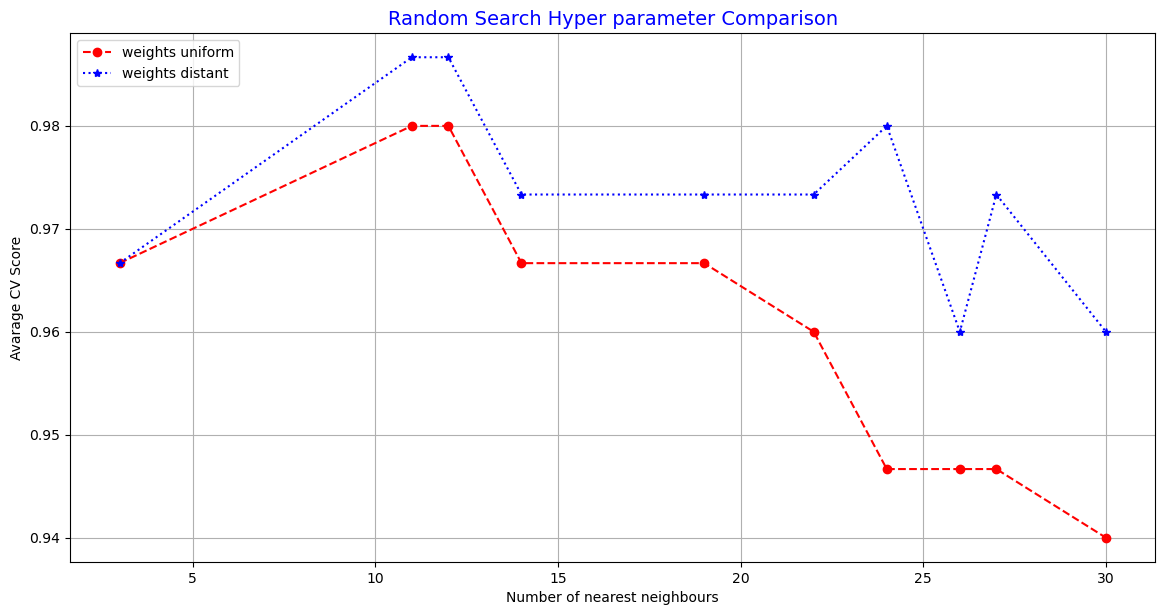

In [168]:
plt.figure(dpi=100, figsize=(14, 7))  # setting the plot size
plt.title("Random Search Hyper parameter Comparison",fontsize=14, color="blue")  # setting the plot title.
plt.plot(sorted_list1,sorted_uniform , "--",marker = "o", label="weights uniform", color="red")  # setting the uniform variables 
                                                            # values to the plot on the y axis and K_list  on the x axis.
plt.plot(sorted_list2,sorted_distance , ":",marker = "*", label="weights distant", color="blue")  # setting the distant 
                                                        # variables values to the plot on the y axis and K_list  on the x axis.
plt.xlabel("Number of nearest neighbours")  # Setting the x label.
plt.ylabel("Avarage CV Score")  # setting the y label.
plt.legend(loc='upper left')   # setting the legend.
plt.grid()  # setting a grid

# Checking predicted/actual results
# Checking testing and traning scores
# Checking Actual values classified correctly and wrongly.
# Checking accuracy, precision, recall and f1 scores

  results
pred-Actual
[[2 2]
 [1 1]
 [0 0]
 [2 2]
 [0 0]
 [2 2]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [2 2]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [2 2]
 [1 1]
 [0 0]
 [0 0]
 [2 2]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [2 2]
 [1 1]
 [0 0]
 [2 2]
 [2 2]
 [1 1]
 [0 0]
 [2 1]]
Model train accuracy:  100.0 %
Model test accuracy:  97.0 %



              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        16
           2       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38

correct_0-incorrct_1
incorrect_0-correct_1

True_Negative-False_positive
False_negative-True_positive



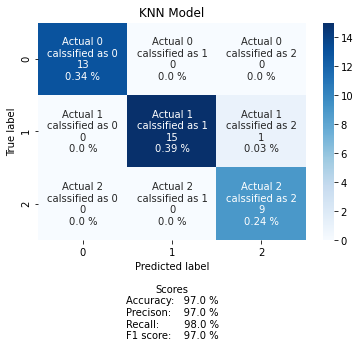

97.0

In [143]:
Classifier_function(KNeighborsClassifier(n_neighbors=1), X_train, y_train,X_test, y_test, "KNN Model")  # using the functions

                                                                                                   # with the arguments given